**INDICE------------------------------------------------------------------------------------------** <a id='back'></a>

* [Introducción.](#intro)
* [Paso 1. Cargar archivo de datos y estudio de la información general.](#paso1)
    * [1.1 Busqueda de datos ausentes.](#paso1-1)
    * [1.2  Manejar valores raros.](#paso1-2)
    * [1.3 Buscar registros duplicados.](#paso1-3)
* [Paso 2. Preparación de los datos.](#paso2)
    * [2.1 Adecuar nombre de columnas.](#paso2-1)
    * [2.2 Manejo de datos de ausentes.](#paso2-2)
    * [2.2.1 Datos de la variable year_of_release.](#paso2-2-1)
    * [2.2.2 Datos de la variable critic_score.](#paso2-2-2)
    * [2.2.3 Datos de la variable user_score.](#paso2-2-3)
    * [2.2.4 Datos de la variable rating.](#paso2-2-4)
    * [2.3 Conviertir los datos en los tipos necesarios.](#paso2-3)
    * [2.4 Calcular las ventas totales para cada juego.](#paso2-4)
    * [2.5 Gestión de datos duplicados.](#paso2-5)
* [Paso 3. Análisís los datos.](#paso3)
    * [3.1 Análisis de datos relevantes para el año 2017.](#paso3-1)
    * [3.2 Análisis del promedio en ventas por plataforma.](#paso3-2)
    * [3.3 Efecto de las reseñas sobre las ventas.](#paso3-3)
    * [3.4 Comparando las ventas de mismos juegos en otras plataformas.](#paso3-4)
* [Paso 4. Creando un perfil de usuario para cada región.](#paso4)
    * [4.1 Cinco plataformas principales.](#paso4-1)
    * [4.2 Cinco géneros principales](#paso4-2)
    * [4.3 Influencia de las Clasificaciones de ESRB](#paso4-3)
* [Paso 5. Pruebas de hipótesis.](#paso5)
    * [5.1 Las plataformas y las calificaciones de usuarios.](#paso5-1)
    * [5.2 Los géneros y las calificaciones de usuarios.](#paso5-2)
* [Paso 6. Conclusión General.](#paso6)

<a id='intro'></a>
#  *   Introducción

La tienda online Ice que vende videojuegos por todo el mundo; proporcionó las reseñas de usuarios y expertos, sobre los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos que están disponibles en diversas fuentes abiertas. 

Por lo  que en este documento se identificará los patrones que determinenan si un juego tiene éxito o no. Esto permitirá detectar proyectos prometedores y planificar campañas publicitarias, para el crecimiento empresaria de la tienda online Ice.
Los datos que se proporcionan se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017. Esto permitiría a al departamento de publicidad verificar con datos históricos, la correcta ruta de las desiciones tomadas para ese periodo de tiempo, ó el de plantear sus estrategias a una nueva ruta.

<a id=paso1></a>
##  . Cargar archivo de datos y estudio de la información general.

In [1]:
# importación de librerias
# Cargar todas las librerías
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import random
import statistics
import math
from datetime import datetime

from scipy.stats import gamma
from typing import List
from scipy import stats as st

In [2]:
#procedemos a importar los datos y 
#abrir el archivo
video_juegos = pd.read_csv('/datasets/games.csv')
#veamos la estructura de esta tabla
video_juegos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Descripción de datos: 
* Name (Nombre)
* Platform (Plataforma)
* Year_of_Release (Año de lanzamiento)
* Genre (Género)
* NA_sales (ventas en Norteamérica en millones de dólares estadounidenses)
* EU_sales (ventas en Europa en millones de dólares estadounidenses)
* JP_sales (ventas en Japón en millones de dólares estadounidenses)
* Other_sales (ventas en otros países en millones de dólares estadounidenses)
* Critic_Score (máximo de 100)
* User_Score (máximo de 10)
* Clasificación (ESRB)

Por su contenido las variables que deben cambiar de tipo de datos son :
* Name, platform, Genre, rating ---> a tipo de datos cadena
* Year_of_Relase, user_score ---> a tipo de datos número entero

.<a id=paso1-1></a>
###  Busqueda datos ausentes.

Verificando datos ausentes:

In [3]:
# calculando valores ausentes
print(video_juegos.isna().sum()) 

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64


Analizando las variables que presentan relevancia para nuestro objeto de estudio.

In [4]:
#analizando los datos nulos en Name                    
video_juegos.loc[video_juegos['Name'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [5]:
#analizando los datos nulos en genre  
video_juegos.loc[video_juegos['Genre'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Estos datos no  aportan gran información por lo que los podemos tomar como basura, es mejor eliminarlos.

In [6]:
#eliminando los datos nulos en genre  
video_juegos.drop([659, 14244],axis=0, inplace = True)

Examinemos los datos ausentes en la variable **year_of_release**.     

In [7]:
#visualizando los datos ausentes en la variable year_of_release
video_juegos.loc[video_juegos['Year_of_Release'].isna() == True]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Hay registros en este caso que es posible imputar el año de realización mediante la información que se encuentra capturadad en el la columna 'name', por ejemplo el caso del registro "Madden NFL 2004".

Examinemos el caso de los registros con el nombre del juego "LEGO Batman: The Videogame"

In [8]:
#filtrando los registros con el nombre LEGO Batman: The Videogame
video_juegos.loc[video_juegos['Name'] == 'LEGO Batman: The Videogame']

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
397,LEGO Batman: The Videogame,X360,2008.0,Action,2.04,1.02,0.0,0.32,76.0,7.9,E10+
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+
460,LEGO Batman: The Videogame,DS,2008.0,Action,1.75,1.01,0.0,0.29,72.0,8,E10+
1519,LEGO Batman: The Videogame,PS3,2008.0,Action,0.72,0.39,0.0,0.19,75.0,7.7,E10+
1538,LEGO Batman: The Videogame,PSP,NaN,Action,0.57,0.44,0.0,0.27,73.0,7.4,E10+
1553,LEGO Batman: The Videogame,PS2,2008.0,Action,0.72,0.03,0.0,0.52,77.0,8.9,E10+
12465,LEGO Batman: The Videogame,PC,2008.0,Action,0.02,0.03,0.0,0.01,80.0,7.8,E10+


Para este caso tenemos registros que podemos usar para imputar el dato faltante en la columna 'year_of_release' el cual es para este caso del año 2008

In [9]:
#examinemos los casos de valores ausentes en la variable ´year_of_release´
# por la columna 'name'
video_juegos.loc[
                video_juegos[
                'Year_of_Release'].isna() == True,
                                'Name'].value_counts()


LEGO Harry Potter: Years 5-7                      7
Happy Feet Two                                    4
Rock Band                                         4
Test Drive Unlimited 2                            3
Bejeweled 3                                       3
                                                 ..
Without Warning                                   1
Valkyria Chronicles III: Unrecorded Chronicles    1
Freaky Flyers                                     1
Maze Craze: A Game of Cops 'n Robbers             1
Wheel of Fortune                                  1
Name: Name, Length: 232, dtype: int64

No aparece ningún valor particular de la columna 'Name', que sea representativo para ser tomado de considerar para analizar desde los datos que tenemos con los registros completos.

In [10]:
# Consideremos el 
video_juegos.loc[
    video_juegos['Name'] == 'WRC: FIA World Rally Championship']

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
7584,WRC: FIA World Rally Championship,PS3,NaN,Racing,0.00,0.14,0.01,0.04,68.0,4.5,NaN
9827,WRC: FIA World Rally Championship,X360,NaN,Racing,0.00,0.10,0.00,0.02,66.0,6,E10+
14233,WRC: FIA World Rally Championship,PSP,2005.0,Racing,0.02,0.01,0.00,0.00,67.0,7.8,E
16180,WRC: FIA World Rally Championship,PC,NaN,Racing,0.00,0.01,0.00,0.00,65.0,NaN,RP


En el registro 14233 tenemos el dato en la columna 'Year_of_Release' de que el 2005.0 para este caso. Podemos usar este dato para imputar a los demás registros con los datos ausentes.

De manera análoga podemos intentar con las demás registros, para este caso.

Es posible que los datos de 2016 estén incompletos.

In [11]:
#visualizando los datos del 20
video_juegos.loc[video_juegos['Year_of_Release'] == 2016.0]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
94,FIFA 17,PS4,2016.0,Sports,0.66,5.75,0.08,1.11,85.0,5,E
108,Pokemon Sun/Moon,3DS,2016.0,Role-Playing,2.98,1.45,2.26,0.45,NaN,NaN,NaN
171,Uncharted 4: A Thief's End,PS4,2016.0,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T
245,Call of Duty: Infinite Warfare,PS4,2016.0,Shooter,1.61,2.00,0.15,0.71,77.0,3.4,M
289,Battlefield 1,PS4,2016.0,Shooter,1.10,2.15,0.21,0.61,88.0,8.4,M
...,...,...,...,...,...,...,...,...,...,...,...
16699,The Longest 5 Minutes,PSV,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN


Podemos decir que una parte de los datos faltates son del 2016, pero no todos pues tenemos en la descripción del dataframe despleguado arriba de estas lineas, que es de 502 menor a los de los datos ausentes de la columna <em> Critic_Score   de    8578 </em>.

In [12]:
#examinemos los casos de valores ausentes en la variable ´user_score  
# por la columna 'name'
video_juegos.loc[
                video_juegos[
                'User_Score'].isna() == True,
                                'Name'].value_counts()

FIFA 12                                                               7
The Amazing Spider-Man 2 (2014)                                       7
Transformers: Revenge of the Fallen (XBox 360, PS3, & PC Versions)    6
The Amazing Spider-Man (Console Version)                              6
Disney Infinity 2.0: Marvel Super Heroes                              6
                                                                     ..
Harukanaru Toki no Naka de 3: Unmei no Meikyuu Aizouban               1
Shinseiki Evangelion: Koutetsu no Girlfriend 2nd Portable             1
Kamigami no Asobi InFinite                                            1
Shin Ken to Mah? to Gakuenmono. Toki no Gakuen                        1
Shining Blade                                                         1
Name: Name, Length: 5796, dtype: int64

In [13]:
#examinemos los casos de valores ausentes en la variable ´critic_score´
# por la columna 'name'
video_juegos.loc[
                video_juegos[
                'Critic_Score'].isna() == True,
                                'Name'].value_counts()

The Amazing Spider-Man 2 (2014)    7
FIFA 12                            7
Rapala Pro Bass Fishing 2010       6
FIFA Soccer 07                     6
Avatar: The Game                   6
                                  ..
SkullMonkeys                       1
MTV Music Generator                1
July                               1
Jampack Winter 2000                1
Army Rescue                        1
Name: Name, Length: 7122, dtype: int64

In [14]:
#examinemos los casos de valores ausentes en la variable ´rating´
# por la columna 'name'
video_juegos.loc[
                video_juegos[
                'Rating'].isna() == True,
                                'Name'].value_counts()

The Amazing Spider-Man 2 (2014)                                       7
FIFA 12                                                               7
The Walking Dead: Season One                                          6
FIFA Soccer 07                                                        6
Transformers: Revenge of the Fallen (XBox 360, PS3, & PC Versions)    6
                                                                     ..
Lips: Deutsche Partyknaller                                           1
Harukanaru Toki no Naka de 3: Unmei no Meikyuu Aizouban               1
Shinseiki Evangelion: Koutetsu no Girlfriend 2nd Portable             1
Kamigami no Asobi InFinite                                            1
Shining Blade                                                         1
Name: Name, Length: 5852, dtype: int64

En los casos anteriores podemos intentar encontrar los valores ausentes usando los datos de registro con el mismo nombre con sus valores completos.

Para la variable <em> Rating</em>, además observemos que utiliza valores de una categoría. 

In [15]:
#observemos que valores toma la variabla Rating
video_juegos['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

.<a id=paso1-2></a>
###  Manejar valores raros.

Tenemos en la variable <em> User_Score</em>, en valor especial con los registros marcados con el acrónimo TBD: significa "to be determined" (a determinar).

In [16]:
#visulizar los registros en la variable user_code con valor
#TBD
video_juegos[video_juegos['User_Score'] == 'tbd']

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Vamos observar todos los valores que se pueden obtener en la columna, **User_Score**.

In [17]:
#listado de valores de la variable User_Score
video_juegos['User_Score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.2       2
2.3       2
9.6       2
9.7       1
0         1
Name: User_Score, Length: 96, dtype: int64

En esta columna vamos a categorizarla, debido a que la magnitud de los datos registrados con TBD, es importante; con esto mantenemos reprensatividad de los datos como muestra de la población que se busca analizar.

.<a id=paso1-3></a>
###  Buscar registros duplicados.

Vamos ha ver si existen duplicados en este DataFrame.

In [18]:
#Revista para verificar que el DataFrame no haya
#registros duplicados
video_juegos.duplicated().sum()

0

Verifiquemos no pueda existir un registro con la misma plataforma, en el mismo año de lanzamiento.

In [19]:
#conforme al párrafo anterior escudriñamos en el DataFrame
video_juegos[['Name', 'Platform', 'Year_of_Release']].value_counts()

Name                              Platform  Year_of_Release
Madden NFL 13                     PS3       2012.0             2
 Beyblade Burst                   3DS       2016.0             1
Ratatouille                       PC        2007.0             1
Rapala Tournament Fishing!        X360      2006.0             1
Rapala Trophies                   PSP       2006.0             1
                                                              ..
Halo Wars                         X360      2009.0             1
Halo: Combat Evolved              PC        2003.0             1
                                  XB        2001.0             1
Halo: Combat Evolved Anniversary  X360      2011.0             1
¡Shin Chan Flipa en colores!      DS        2007.0             1
Length: 16443, dtype: int64

.<a id=paso2></a>
##  Preparación de los datos.

.<a id=paso2-1></a>
###  Adecuar nombre de columnas.

Reemplacemos los nombres de las columnas para que todos esten  en minúsculas.


In [20]:
#analisis_usu3 = analisis_usu3.rename(columns = {"id":"llamadas"})
video_juegos = video_juegos.rename(columns = {'Name':'name',
                                              'Platform':'platform', 
                                              'Year_of_Release': 'year_of_release', 
                                              'Genre':'genre',  
                                              'NA_sales':'na_sales', 
                                              'EU_sales':'eu_sales',
                                              'JP_sales':'jp_sales',  
                                              'Other_sales':'other_sales',
                                              'Critic_Score':'critic_score',  
                                              'User_Score':'user_score', 
                                              'Rating':'rating' })
video_juegos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


.<a id=paso2-2></a>
###  Manejo de datos ausentes.

Trataremos el las opciones de eliminación de datos ó de imputación analizando el caso por columnas. Lo anterior se hace debido a las posibles modificaciones en la representatividad de los datos al usar la imputación; provocando sesgos por ejemplo. 


Ahora vamos a definir tabla dinámicas para usar posteriormente una función que se implenta para buscar imputar los datos ausentes identificados en la sección anterior.

.<a id=paso2-2-1></a>
####  Datos de la variable year_of_release.

Hagamos un pequeño análisis, para definir si hacemos una imputación esta columna o quizas, eliminar los datos de nuestro estudio.

Para decidir que es mejor, definamos que tanto impacto tendrán la eliminación de datos, si el porcentaje es alto será un indicador muy determinante en no eliminar los registros que se encuentran ausentes en la columna <em>year_of_release</em>.

In [21]:
#para determinar el porcentaje de datos ausentes
#en la columna year_of_release
'PORCENTAJE DE VALORES AUSENTES EN year_of_release EN COMPARACIÓN CON '  + (
'EL CONJUNTO DE DATOS COMPLETO:' + "{: .2%}".format(( 
    video_juegos['year_of_release'].isna().sum()/len(video_juegos) )))

'PORCENTAJE DE VALORES AUSENTES EN year_of_release EN COMPARACIÓN CON EL CONJUNTO DE DATOS COMPLETO: 1.61%'

Observamos que los datos si se omiten no son de gran volumen en el porcentaje que conforman la totalidad en nuestro dataframe. Por lo anterior no se omitirán sin temor a que tengan gran impacto en la naturaleza de la muestra.


In [22]:
#eliminamos los datos nulos en la columna year_of_release
video_juegos.dropna(subset=['year_of_release'], inplace = True)

In [23]:
#verificamos que no existan datos vacios 
print('DATOS CON REGISTROS AUSENTES EN LA COLUMNA year_of _release')
video_juegos.loc[
                video_juegos[
                'year_of_release'].isna() == True, 'year_of_release'].count()

DATOS CON REGISTROS AUSENTES EN LA COLUMNA year_of _release


0

.<a id=paso2-2-2></a>
####  Datos de la variable critic_score.

Primero analicemos los registros ausente en la columna <em> critic_score </em>. En el contexto de cuantos registros tenemos en esta condición.

In [24]:
#para determinar el porcentaje de datos ausentes
#en la columna critic_score
'PORCENTAJE DE VALORES AUSENTES EN critic_score EN COMPARACIÓN CON '  + (
'EL CONJUNTO DE DATOS COMPLETO:' + "{: .2%}".format(( 
    video_juegos['critic_score'].isna().sum()/len(video_juegos) )))

'PORCENTAJE DE VALORES AUSENTES EN critic_score EN COMPARACIÓN CON EL CONJUNTO DE DATOS COMPLETO: 51.45%'

Es un porcentaje considerable. No es opción eliminar los datos para este caso la población que se analiza será afectada por tan importante eliminación del estudio. Si se opta por la imputación en los datos relacionados a critic_score puede traer problemas en las pruebas estadísticas que deseamos aplicar sobre ese dato. 

Se les mantendrá con el valor nan al considerarlo un dato importante, teniendolo en consideración cuando se haga analisis sobre esta variable.

.<a id=paso2-2-3></a>
####  Datos de la variable user_score.

Primero analicemos los registros ausentes en la columna <em> user_score </em>. En el contexto de cuantos registros tenemos en esta condición.

In [25]:
#para determinar el porcentaje de datos ausentes
#en la columna user_score
'PORCENTAJE DE VALORES AUSENTES EN critic_score EN COMPARACIÓN CON '  + (
'EL CONJUNTO DE DATOS COMPLETO:' + "{: .2%}".format(( 
    video_juegos['user_score'].isna().sum()/len(video_juegos) )))

'PORCENTAJE DE VALORES AUSENTES EN critic_score EN COMPARACIÓN CON EL CONJUNTO DE DATOS COMPLETO: 40.17%'

Es un porcentaje considerable. No es opción eliminar los datos para este caso; la población que se analiza será afectada por tan importante eliminación del estudio. Si se opta por la imputación en los datos relacionados a <em> user_score </em> puede traer problemas en las pruebas estadísticas que deseamos aplicar sobre ese dato. 

Se les mantendrá con el valor nan al considerarlo un dato importante, teniendolo en consideración cuando se haga analisis sobre esta variable.

Como tenemos una variable categórica, para este caso, vamos a realizar una columna para caracterizarla.

Vamos ahora a categorizar esta variable mediante una columna a la que llamaremos <em>cat_userScore</em>.

Como los valores que indican:
- TBD; significa "to be determined" (a determinar) se les calificara como 0, puesto que no sean designado ninguna calificación para determinar la opinión de los usuarios.
- Los que tengan calificación menor 6 como reprobados asignado valores negativos.
- Los que tengan calificación mayor a 6 serán tomados como aprobados,
- Los que tienen calificaciones de cero se les asignara la categoria de -0.1, del lado de los reprobados.

In [26]:
#vamos a categorizar la columna de 'price'
#definimos la función para implantar las categorias de la columna 'price'

def jerarquia_cat_user_Score(dato): 
    if str(dato) == 'nan':
        return -1 
    if str(dato) == 'tbd':
        return 0
    if float(dato) == 0:
        return -0.1    
    if float(dato) < 6:
        return -float(dato)
    else:
        return float(dato)
    
#asignamos categorias al cat_userScore                                                                               
video_juegos['cat_user_Score'] = video_juegos['user_score'].agg(jerarquia_cat_user_Score)
video_juegos['cat_user_Score'].describe()                                                                       

count    16444.000000
mean         2.067119
std          4.494265
min         -5.900000
25%         -1.000000
50%          0.000000
75%          7.300000
max          9.700000
Name: cat_user_Score, dtype: float64

.<a id=paso2-2-4></a>
####  Datos de la variable rating.

Pasemos finalmente a imputar los datos de la variable <em> rating</em>; para esto es necesario hacerlo de manera análoga al inciso anterior ya que esta variable también es categórica.

In [27]:
#pasemos a definir las tabla dinámicas que nos ayudarán
# deben ser usando la agrupación de datos completos de la misma 
# por medio de las variables names y platform.

filtro_rating = video_juegos.loc[
    video_juegos['rating'].isna() == False]

datos_rating = filtro_rating.pivot_table(
    index = 'name',
    values = 'rating',
    aggfunc = pd.Series.mode)


datos_rating

,rating
name,
Tales of Xillia 2,T
.hack//Infection Part 1,T
.hack//Mutation Part 2,T
.hack//Outbreak Part 3,T
007 Racing,T
...,...
thinkSMART,E
thinkSMART FAMILY!,E
thinkSMART: Chess for Kids,E


In [28]:
#esta tabla dinámica es usada si no se encuentra los datos 
#de búsqueda en la tabla dinámica que usa la variable name 
#como index, creada anteriormente
datos_rating2 = filtro_rating.pivot_table(
    index = 'platform',
    values = 'rating',
    aggfunc = pd.Series.mode)


datos_rating2

,rating
platform,
3DS,E
DC,T
DS,E
GBA,E
GC,E
PC,T
PS,E
PS2,T
PS3,T


In [29]:
#esta tabla dinámica es usada si no se encuentra los datos 
#de búsqueda en la tabla dinámica que usa la variable name 
#como index, creada anteriormente
datos_rating3 = filtro_rating.pivot_table(
    index = 'genre',
    values = 'rating',
    aggfunc = pd.Series.mode)
datos_rating3

,rating
genre,
Action,T
Adventure,E
Fighting,T
Misc,E
Platform,E
Puzzle,E
Racing,E
Role-Playing,T
Shooter,M


In [30]:
#definiendo la función para la imputación de 'rating'
def imputa_rating(datos):
    if pd.isna(datos['rating']):
        try:
            if len(datos_rating ['rating'][datos['name']]) > 1:
                return str(datos_rating ['rating'][datos['name']])
            return datos_rating ['rating'][datos['name']]
        except:
            try:
                return datos_rating2 ['rating'][datos['platform']]
            except:
                return datos_rating3 ['rating'][datos['genre']]
    return datos['rating']
    

In [31]:
#realizamos la imputación de datos 
video_juegos['rating'] = video_juegos.apply(
                                    imputa_rating, axis = 1)

In [32]:
# verificamos que no haya mas valores ausentes 
#en la columna 'rating'
print('DATOS CON REGISTROS AUSENTES EN LA COLUMNA rating')

video_juegos['rating'].isnull().sum() 

DATOS CON REGISTROS AUSENTES EN LA COLUMNA rating


0

.<a id=paso2-3></a>
### Conviertir los datos en los tipos necesarios

Convirtamos a los datos en los tipos necesarios. Para poder realizar manipulaciones de datos en el análisis sin problemas.

In [33]:
#verifiquemos nuevamente los tipos de datos del Dataframe
video_juegos.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
cat_user_Score     float64
dtype: object

In [34]:
#Convirtamos a tipo de datos cadena de caracteres
video_juegos = video_juegos.astype({"name": 'str', "platform": 'str', 
                                    "genre": 'category', "rating": 'category'})

#Convirtamos a tipo de datos entero las variables correspondientes
video_juegos = video_juegos.astype({"year_of_release": 'int64'})
                                   # , 
                                   # "critic_score": 'int64'})
video_juegos.dtypes

name                 object
platform             object
year_of_release       int64
genre              category
na_sales            float64
eu_sales            float64
jp_sales            float64
other_sales         float64
critic_score        float64
user_score           object
rating             category
cat_user_Score      float64
dtype: object

.<a id=paso2-4></a>
### Calcular las ventas totales para cada juego.

 El cálculo de ventas totales es indicador importante que nos puede indicar el éxito en ventas del video juego. Colocaremos esta información en una columna separada.

In [35]:
#esta es la columna designada
video_juegos['ventas_totales'] = (video_juegos['na_sales'] + 
                                  video_juegos['eu_sales'] + 
                                  video_juegos['jp_sales'] + 
                                  video_juegos['other_sales'])
video_juegos['ventas_totales'].describe()

count    16444.000000
mean         0.536023
std          1.558786
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: ventas_totales, dtype: float64

.<a id=paso2-5></a>
### Gestión de datos duplicados

Los duplicados en los datos de cadena exigen una atención especial. Desde el punto de vista de Python, una `'A'` mayúscula y una `'a'` minúscula son símbolos diferentes.

Para detectar entradas duplicadas como esas, podemos cambiar todos los caracteres de la cadena a todos a minúsculas ó bien a mayúsculas, cuando se requiere.

In [36]:
#Reduciendo todo en las columnas con tipo cadena de caracteres
#a letras minúsculas ó letras mayúsculas
video_juegos['name'] = video_juegos['name'].str.lower()
video_juegos['platform'] = video_juegos['platform'].str.lower()
video_juegos['genre'] = video_juegos['genre'].str.lower()
video_juegos['rating'] = video_juegos['rating'].str.upper()

#para visualizar el cambio
video_juegos

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,cat_user_Score,ventas_totales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8,E,8.0,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,E,-1.0,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,8.3,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8,E,8.0,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,T,-1.0,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,T,-1.0,0.01
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,T,-1.0,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,T,-1.0,0.01
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,E,-1.0,0.01


Ahora vamos a visualizar el único par de registros que tienen el mismo nombre de video juego, en la misma plataforma, en el mismo año de lanzamiento.

In [37]:
#Registros duplicados en name, plataform y year_of_release
video_juegos[(video_juegos['name'] == ('Madden NFL 13').lower())
            & (video_juegos['platform'] == ('PS3').lower())
            & (video_juegos['year_of_release'] == 2012)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,cat_user_Score,ventas_totales
604,madden nfl 13,ps3,2012,sports,2.11,0.22,0.0,0.23,83.0,5.5,E,-5.5,2.56
16230,madden nfl 13,ps3,2012,sports,0.00,0.01,0.0,0.00,83.0,5.5,E,-5.5,0.01


Podemos observar que solo una diferencia en las columnas <em>eu_sales</em> y  <em>eu_sales</em>, sumaremos la cantidad de 0.01, en la mencionada columna en el registro 604, claro antes borraremos el registro con el índice 16230.

In [38]:
#Borrar el registro con el índice 16230
video_juegos.drop(16230, axis=0, inplace=True)

#se suma 0.01 en la columna eu_sales
video_juegos.iloc[604,5] = 0.22 + 0.01

#se suma 0.01 en la columna ventas_totales
video_juegos.iloc[604,11] = 2.56 + 0.01

#verificando los cambios
video_juegos[(video_juegos['name'] == ('Madden NFL 13').lower())
            & (video_juegos['platform'] == ('PS3').lower())
            & (video_juegos['year_of_release'] == 2012)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,cat_user_Score,ventas_totales
604,madden nfl 13,ps3,2012,sports,2.11,0.22,0.0,0.23,83.0,5.5,E,-5.5,2.56


<a id=paso3></a>
## . Análisis de los datos.

Vamos a ser un escaneo para obtener información sobre cuántos juegos fueron lanzados en diferentes años. ¿Serán significativos los datos de cada período?

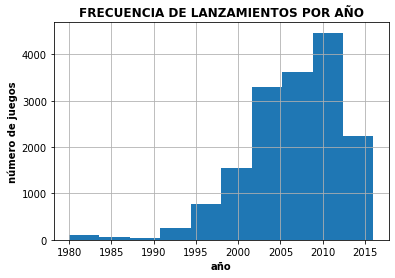

In [39]:
#relizando un histograma de frecuencias nos dira cuantos registros
#es decir cuanto juegos fueron lanzados con los datos 
#registrados en la columna year_of_release
video_juegos['year_of_release'].hist()
plt.title('FRECUENCIA DE LANZAMIENTOS POR AÑO', fontweight ='bold', fontsize = 12)
plt.xlabel('año', fontweight ='bold', fontsize = 10)
plt.ylabel('número de juegos', fontweight ='bold', fontsize = 10)
plt.grid(True)
plt.show()   
 

Como puede observarse había una clara tendencia a incrementarse hasta pasar el año 2010, con una notable recaida hacia 2015.

Observemos si varían las ventas de una plataforma a otra.

In [40]:
# relizamos la suma de las ventas totales agrupadas 
# por plataformas
datos_ventas = video_juegos.pivot_table(
    index = 'platform',
    values = 'ventas_totales',
    aggfunc = 'sum')
datos_ventas

,ventas_totales
platform,
2600,86.48
3do,0.10
3ds,257.81
dc,15.95
ds,802.78
gb,254.43
gba,312.88
gc,196.73
gen,28.35


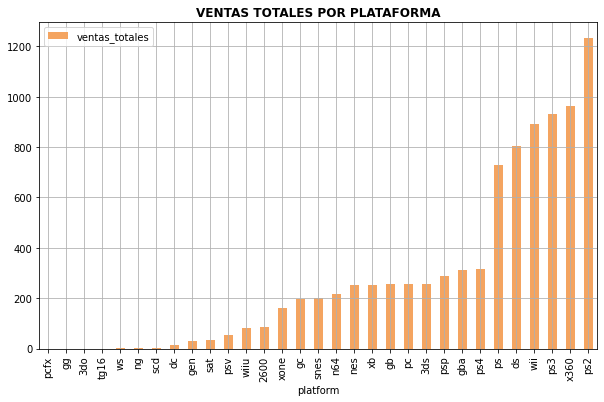

In [41]:
#trazamos los datos mediante un gráfico de barras

datos_ventas.sort_values(by = 'ventas_totales', 
                         ascending=True).plot(kind='bar', 
                   figsize=(10, 6), 
                   color = 'sandybrown') 
plt.title('VENTAS TOTALES POR PLATAFORMA', fontweight ='bold', fontsize = 12)
plt.grid(True)
plt.show()          

Las plataformas con mayores ventas totales son **x360** y **ps2**. Construyamos ahora una distribución basada en los datos de cada año.

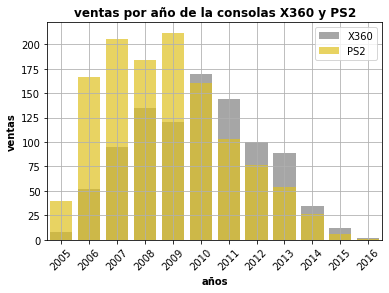

In [42]:
#creado 2 dataframes para los datos de cada plataforma
X360_ventas = video_juegos.loc[
              video_juegos['platform'] == 'x360'].sort_values(by = 'year_of_release')
PS2_ventas = video_juegos.loc[
              video_juegos['platform'] == 'ps2'].sort_values(by = 'year_of_release')

#Creamos un frame auxiliar para observar el comportamiento de el número de
#de fechas en call_date 
data1 = X360_ventas.pivot_table(index = 'year_of_release',
                                values = 'ventas_totales',
                                aggfunc = 'sum')

data2 = PS2_ventas.pivot_table(index = 'year_of_release',
                                values = 'ventas_totales',
                                aggfunc = 'sum')
#realizamos la traza de los dos grupos de datos anteriores
#en una gráfica comparativa. X360
sns.barplot(x=data1.index, 
            y=data1['ventas_totales'], 
            alpha=0.7,
            label="X360",
            color="gray")
#usando los limites obtenidos con los valores atípicos PS2
sns.barplot(x=data1.index, 
            y=data2['ventas_totales'], 
            alpha=0.7,
            label="PS2",
            color="gold")
plt.legend()
plt.title('ventas por año de la consolas X360 y PS2', fontweight ='bold', fontsize = 12)
plt.xlabel('años', fontweight ='bold', fontsize = 10)
plt.ylabel('ventas', fontweight ='bold', fontsize = 10)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Aboquemos hacer una busqueda de las plataformas que solían ser populares pero que ahora no tienen ventas.

In [43]:
#traduciendo en código phyton  la oración anterior
#podemos expresarla ...
#tenemos un DataFrame para las peores ventas en video juegos en la última decáda
enCaida = video_juegos[(video_juegos.year_of_release.isin(
                                    range (2011, 2017, 1)))
             & (video_juegos['ventas_totales'] < 0.1)
            ].sort_values(by ='year_of_release')

#tenemos un DataFrame para las mejores ventas de los video juegos
#en los años anteriores
EnCrecida = video_juegos[(video_juegos.year_of_release.isin(
                                    range (1980, 2011, 1)))
             & (video_juegos['ventas_totales'] > 0.9)
            ].sort_values(by ='year_of_release')



In [44]:
#los dos dataframes son concatenados para obtener los datos de
#por una parte de las plataformas populares, en el pasado
#con las plataformas en olvido en la actualidad
plataform_desuso = pd.concat([EnCrecida, enCaida], sort=False)
plataform_desuso

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,cat_user_Score,ventas_totales
546,missile command,2600,1980,shooter,2.56,0.17,0.00,0.03,NaN,NaN,M,-1.0,2.76
1764,kaboom!,2600,1980,misc,1.07,0.07,0.00,0.01,NaN,NaN,E,-1.0,1.15
1968,defender,2600,1980,misc,0.99,0.05,0.00,0.01,NaN,NaN,T,-1.0,1.05
262,asteroids,2600,1980,shooter,4.00,0.26,0.00,0.05,NaN,NaN,M,-1.0,4.31
736,frogger,2600,1981,action,2.06,0.12,0.00,0.02,NaN,NaN,T,-1.0,2.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13715,bullet girls 2,psv,2016,action,0.00,0.00,0.04,0.00,NaN,NaN,T,-1.0,0.04
13721,nobunaga's ambition: sphere of influence - sen...,psv,2016,misc,0.00,0.00,0.04,0.00,NaN,NaN,T,-1.0,0.04
13729,rugby challenge 3,ps4,2016,sports,0.00,0.04,0.00,0.01,64.0,6.8,E,6.8,0.05
13425,12-sai. koisuru diary,3ds,2016,adventure,0.00,0.00,0.05,0.00,NaN,NaN,E,-1.0,0.05


In [45]:
#realizamos un objeto series para poder obtener los años en
#en que se realizarón los últimos juegos para cada plataforma
fin_plataforma = plataform_desuso.groupby('platform')['year_of_release'].max()

In [46]:
#realizamos un objeto series para poder obtener los años en
#en que se realizarón los primeros juegos para cada plataforma
inicio_plataforma = plataform_desuso.groupby('platform')['year_of_release'].min()

In [47]:
#para unir la información de los dos objetos series realizamos un
#diccionario de datos 
datos = {'inicio': inicio_plataforma, 'fin':fin_plataforma }
#manufacturamos un dataframe para poder recepcionar los datos 
#del diccionario 
vida_plataform = pd.DataFrame.from_dict(datos)
#finalmente realizamos una columna que indique el periodo 
#de vida de cada plataforma
vida_plataform['periodo'] = vida_plataform['fin'] - vida_plataform['inicio']
vida_plataform = vida_plataform.sort_values(by ='periodo')
vida_plataform

,inicio,fin,periodo
platform,,,
scd,1993,1993,0
sat,1994,1995,1
dc,1998,2000,2
ps4,2014,2016,2
2600,1980,1983,3
xone,2013,2016,3
gen,1990,1994,4
n64,1996,2000,4
wiiu,2012,2016,4


Trazamos la información, de la tabla anterior para visualizar los periodos de vida de cada plataforma.

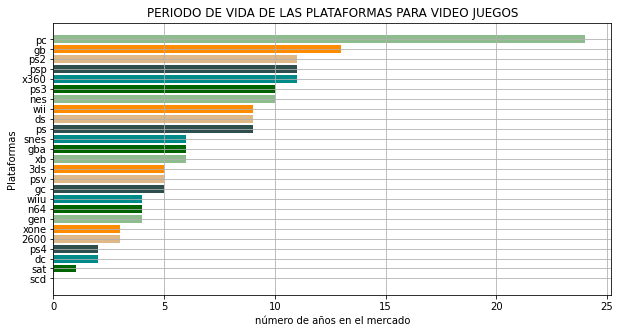

In [48]:

consolas = vida_plataform.index
values = vida_plataform['periodo']
matices=['DarkSeaGreen', 'Darkgreen', 'DarkCyan', 'DarkSlateGray', 'burlywood', 'DarkOrange']
fig = plt.figure(figsize=(10, 5))
 
# usando un gráfico tipo barra para indicar los datos del data frame anterior
plt.barh(consolas, values, color= matices) 
plt.xlabel("número de años en el mercado")
plt.ylabel("Plataformas")
plt.title("PERIODO DE VIDA DE LAS PLATAFORMAS PARA VIDEO JUEGOS")
plt.grid(True)
plt.show()


In [49]:
print('EL PERIODO PROMEDIO DE VIDA DE LAS PLATAFORMAS ES DE:', 
      vida_plataform['periodo'].mean(), ' años' )

EL PERIODO PROMEDIO DE VIDA DE LAS PLATAFORMAS ES DE: 6.92  años


In [50]:
print('EL PERIODO MEDIO DE VIDA DE LAS PLATAFORMAS ES DE:', 
      vida_plataform['periodo'].median(), ' años' )

EL PERIODO MEDIO DE VIDA DE LAS PLATAFORMAS ES DE: 6.0  años


Los estadísticos anteriores nos indican que las plataformas tienen un periordo de vida de poco más de 7 años. 

Mientras que las plataformas nuevas deben aparecer de la diferencia de valores que obtendramos entre los inicios de cada plataforma registrada, ordenadas de manera ascendente.

In [51]:
#ordenamos la columna en forma ascendente que tiene los años de 
#lanzamiento registrados de cada consola
Serie_años_ini = vida_plataform['inicio'].sort_values(ascending=False)
#relizamos un list que nos indica la diferencia entra los años de lanzamiento
lista_diferencias = []
anterior = Serie_años_ini[0]
#recorriendo los elementos del dataframe que realizamos con la información
#de los periodos en años de las plataformas
for i in Serie_años_ini:
    if anterior == Serie_años_ini[0]:
        next
    lista_diferencias.append(anterior - i)
    anterior = i


In [52]:
#para poder obtener un estadistíco de esta list
media = statistics.mean(lista_diferencias)
print('EL PERIODO EN QUE MEDIO EN QUE SURGEN UNA PLATAFORMA NUEVA ES: '
      , media)

EL PERIODO EN QUE MEDIO EN QUE SURGEN UNA PLATAFORMA NUEVA ES:  1


Para construir un modelo predictivo para el 2017, debemos usar los datos del periodo 2012-2016, esto en base a los resultados anteriormente obtenidos.

.<a id=paso3-1></a>
### Análisis de datos relevantes para el año 2017.

In [53]:
#Trabajaremos solo con los datos que consideras relevantes.
#Ignoraremos  los datos de años anteriores ,es decir que estan fuera 
#de nuestro periodo 2012-2016.
filtro2016 = video_juegos[
    video_juegos.year_of_release.isin(range (2012, 2016, 1))]
filtro2016

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,cat_user_Score,ventas_totales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,M,8.2,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,M,8.1,16.27
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,T,-1.0,14.63
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,E,-1.0,14.60
34,call of duty: black ops ii,ps3,2012,shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,-5.3,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16674,tsukigime ranko's longest day,ps3,2014,action,0.00,0.01,0.00,0.00,NaN,NaN,T,-1.0,0.01
16678,end of nations,pc,2012,strategy,0.01,0.00,0.00,0.00,NaN,NaN,T,-1.0,0.01
16682,grisaia no kajitsu: la fruit de la grisaia,psp,2013,adventure,0.00,0.00,0.01,0.00,NaN,NaN,T,-1.0,0.01
16692,metal gear solid v: ground zeroes,pc,2014,action,0.00,0.01,0.00,0.00,80.0,7.6,M,7.6,0.01


Analicemos las **ventas totales**, en este filtro, para observar que plataformas fueron las lideres en ventas en el periodo 2012-2016.

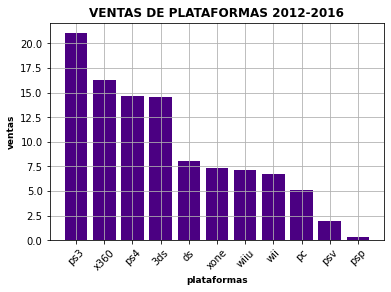

In [54]:
#realizamos la traza del filtro de datos para el periodo 2012-201
# creando la gráfica de barras
plt.bar(filtro2016['platform'], filtro2016['ventas_totales'], 
        color = 'indigo') 
 
plt.xlabel("plataformas", fontweight ='bold', fontsize = 9)
plt.ylabel("ventas", fontweight ='bold', fontsize = 9)
plt.title("VENTAS DE PLATAFORMAS 2012-2016", fontweight ='bold', fontsize = 12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Vamos a analizar las plataformas según su desempeño por año.

In [55]:
#implementar una tabla dinámica para resumir las ventas
#para cada plataforma por año dentro del período 2012-2016
desempeño2016 = filtro2016.pivot_table(index='platform',
                       values='ventas_totales', 
                       columns ='year_of_release',
                       aggfunc='sum')
desempeño2016

year_of_release,2012,2013,2014,2015
platform,,,,
3ds,51.36,56.57,43.76,27.78
ds,11.01,1.54,NaN,NaN
pc,23.22,12.38,13.28,8.52
ps3,107.35,113.25,47.76,16.82
ps4,NaN,25.99,100.00,118.90
psp,7.69,3.14,0.24,0.12
psv,16.19,10.59,11.90,6.25
wii,21.71,8.59,3.75,1.14
wiiu,17.56,21.65,22.03,16.35


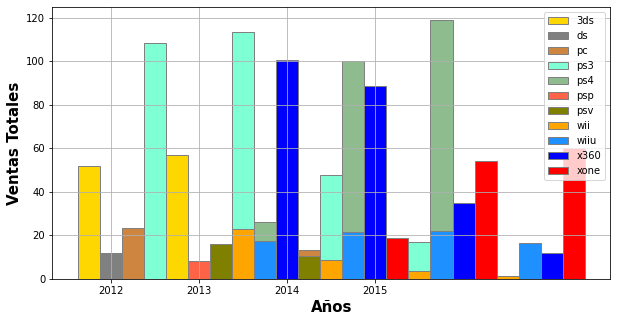

In [56]:

# Definimos el espacio de trabajo para cada barra 
#indicadora del progreso en ventas de cada plataforma
barWidth = 0.25
fig = plt.subplots(figsize =(10, 5))

# usando los datos de nuestra tabla dinámica
#tenemos los siguientes datos

tresds=[51.76, 57.04, 3.76, 27.78]
ds=[11.67, 1.54 ,0, 0]
pc=[23.45, 13.01, 13.28, 8.52]
ps3=[108.28, 113.25, 47.76, 16.82]
ps4=[0, 25.99, 100.00, 118.90]
psp=[7.95, 3.38, 0.24, 0.12]
psv=[16.19, 10.59, 12.16, 6.25]
wii=[22.94, 8.59, 3.75, 1.14]
wiiu=[17.56, 21.65, 22.03, 16.35]
x360=[100.72, 88.58, 34.74, 11.96]
xone= [0, 18.96, 54.07, 60.14]
# posiones de cada una de las listas de datos frente al indicador
# horizontal de cada año 
br1 = np.arange(len(tresds))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]
br7 = [x + barWidth for x in br6]
br8 = [x + barWidth for x in br7]
br9 = [x + barWidth for x in br8]
br10 = [x + barWidth for x in br9] 
br11 = [x + barWidth for x in br10] 

    
# implementación de las gráficas de barras para cada plataforma
plt.bar(br1, tresds, color ='gold', width = barWidth,
edgecolor ='grey', label ='3ds')
plt.bar(br2, ds, color ='grey', width = barWidth,
edgecolor ='grey', label ='ds')
plt.bar(br3, pc, color ='peru', width = barWidth,
edgecolor ='grey', label ='pc')
plt.bar(br4, ps3, color ='aquamarine', width = barWidth,
edgecolor ='grey', label ='ps3')
plt.bar(br5, ps4, color ='darkseagreen', width = barWidth,
edgecolor ='grey', label ='ps4')
plt.bar(br6, psp, color ='tomato', width = barWidth,
edgecolor ='grey', label ='psp')        
plt.bar(br7, psv, color ='olive', width = barWidth,
edgecolor ='grey', label ='psv')
plt.bar(br8, wii, color ='orange', width = barWidth,
edgecolor ='grey', label ='wii')
plt.bar(br9, wiiu, color ='dodgerblue', width = barWidth,
edgecolor ='grey', label ='wiiu')
plt.bar(br10, x360, color ='b', width = barWidth,
edgecolor ='grey', label ='x360')
plt.bar(br11, xone, color ='red', width = barWidth,
edgecolor ='grey', label ='xone')


# Se adicionan los titulos
plt.xlabel('Años', fontweight ='bold', fontsize = 15)
plt.ylabel('Ventas Totales', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(tresds))],
    ['2012', '2013', '2014', '2015'])

plt.legend()
plt.grid(True)
plt.show()


Los resultados obtenidos son:
 - Las plataformas líderes en ventas; PS3, X360, PS4, 3DS.
 - En crecimiento: PS2, WIIU, etc.

.<a id=paso3-2></a>
### Análisis del promedio en ventas por plataforma.

Analizaré con un diagrama de caja  las ventas globales de todos los juegos, desglosados por plataforma. Lo anteiror para buscar diferencias significativas en las ventas. 

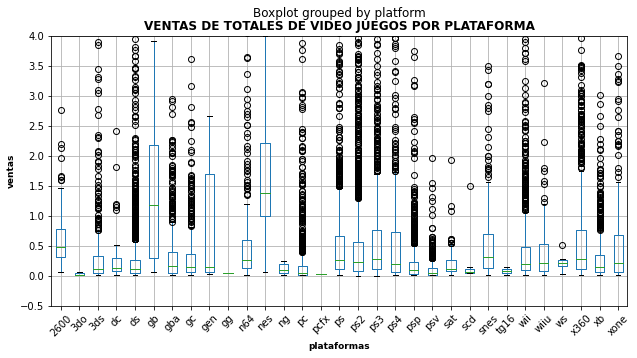

In [57]:
#se realiza un gráfico tipo caja para observar las ventas 
#desglozabo por plataformas

video_juegos.boxplot(column= 'ventas_totales', 
                     by ='platform', 
                     figsize=(10, 5))
plt.xticks(rotation=45)
plt.xlabel("plataformas", 
           fontweight ='bold', 
           fontsize = 9)
plt.ylabel("ventas", 
           fontweight ='bold', 
           fontsize = 9)
plt.title("VENTAS DE TOTALES DE VIDEO JUEGOS POR PLATAFORMA", 
          fontweight ='bold', 
          fontsize = 12)
plt.xticks(rotation=45)
plt.ylim(-0.5, 4)  #establece el rango para el eje vertical
plt.grid(True)
plt.show()

Existe mucha dispersión en los datos considerados atípicos. Observemos las ventas promedio para observar la tendencia central de la muestra.

In [58]:
#implemetamos una tabla dinámica, que nos permita visulizar
#la información de ventas promedio por plataforma
venta_promedio_plataform = video_juegos.pivot_table(
    index='platform', 
    values='ventas_totales',
    aggfunc='mean')
venta_promedio_plataform.sort_values(by=['ventas_totales'])

,ventas_totales
platform,
pcfx,0.030000
3do,0.033333
gg,0.040000
tg16,0.080000
ng,0.120000
psv,0.125431
sat,0.194162
ws,0.236667
psp,0.242691


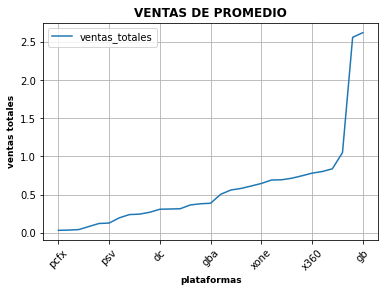

In [59]:
#implementamos un gráfico para visulizar la diferencia que
#se presenta en unas plataforma con respecto a las demas
venta_promedio_plataform.sort_values(by=['ventas_totales']).plot()
plt.xticks(rotation=45)
plt.xlabel("plataformas", fontweight ='bold', fontsize = 9)
plt.ylabel("ventas totales", fontweight ='bold', fontsize = 9)
plt.title("VENTAS DE PROMEDIO", fontweight ='bold', fontsize = 12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Sucede que hay cambios al considerar  las ventas promedio por plataformas. Se presentan con amplia superioridad a las consolas: **gb, nes** y **gen**.

.<a id=paso3-3></a>
### Efecto de las reseñas sobre las ventas.

Para observar cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular, implementemos un gráfico de dispersión 

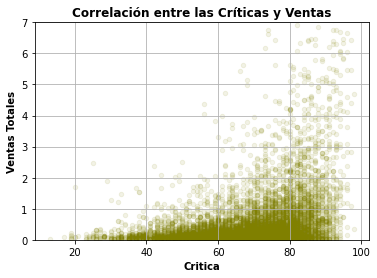

In [60]:
#implemetamos el gráfico de dispersión propuesto en las lineas 
#anteriormente descritas
video_juegos.plot(x='critic_score', 
                  y='ventas_totales', 
           kind='scatter', 
           alpha=0.1, color = 'olive')
plt.title('Correlación entre las Críticas y Ventas', 
          fontweight ='bold', fontsize = 12)  
plt.ylim(0, 7)
plt.xlabel('Critica', fontweight ='bold', fontsize = 10)
plt.ylabel('Ventas Totales', fontweight ='bold', fontsize = 10)
plt.grid(True)
plt.show()

Existe forma de medir la correlación que se presenta visualmente en el gráfico anterior, mediante el uso del coeficiente de correlación de Pearson.

In [61]:
# vamos a comparar las ventas promedio contra las evaluaciones de las
#criticas de expertos en el tema 
video_juegos['critic_score'].corr(video_juegos['ventas_totales']) 

0.24541357385073304

Existe una correlación positiva, aunque muy débil.

A continuación usemos la categorización, de la columna usando la variable, <em> cat_user_Score </em>.

In [62]:
#cambiamos el tipo de datos para poder potenciar una
#prueba de correlación lineal con la variable ventas_totales
video_juegos['cat_user_Score'] = video_juegos['cat_user_Score'].astype('float')
video_juegos['cat_user_Score'].dtypes


dtype('float64')

Observemos si se observa correlación entre los valores reprobatorios de la variable.

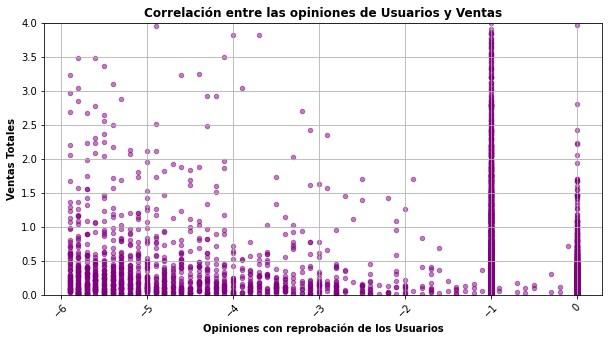

In [63]:
#implemetamos el gráfico de dispersión propuesto en las lineas 
#anteriormente descritas
video_juegos.loc[video_juegos['cat_user_Score'] <= 0].sort_values( by = 'cat_user_Score', 
                         ascending=True).plot(x='cat_user_Score', 
                                              y='ventas_totales', 
                                              kind='scatter', 
                                              alpha=0.5, 
                                              color = 'purple', 
                                              figsize=(10, 5))
plt.title('Correlación entre las opiniones de Usuarios y Ventas', 
          fontweight ='bold', fontsize = 12)  
plt.ylim(0, 4)
plt.xlabel('Opiniones con reprobación de los Usuarios', fontweight ='bold', fontsize = 10)
plt.ylabel('Ventas Totales', fontweight ='bold', fontsize = 10)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

Teniendo en cuenta que modificamos los datos a negativos para calificaciones reprobatorias y que incluimos los valores de cero,que expresan los valores TBD, de los video juegos por evaluar. A la vista hay cierta tendencia de correlación linea, positiva.

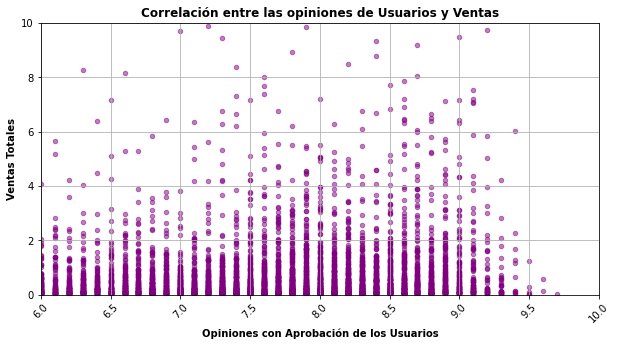

In [64]:
#implemetamos el gráfico de dispersión propuesto en las lineas 
#anteriormente descritas
video_juegos.loc[video_juegos['cat_user_Score'] >= 0].sort_values( by = 'cat_user_Score', 
                         ascending=True).plot(x='cat_user_Score', 
                                              y='ventas_totales', 
                                              kind='scatter', 
                                              alpha=0.5, 
                                              color = 'purple', 
                                              figsize=(10, 5))
plt.title('Correlación entre las opiniones de Usuarios y Ventas', 
          fontweight ='bold', fontsize = 12)  
plt.xlim(6, 10)
plt.ylim(0, 10)
plt.xlabel('Opiniones con Aprobación de los Usuarios', fontweight ='bold', fontsize = 10)
plt.ylabel('Ventas Totales', fontweight ='bold', fontsize = 10)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

El analisís de la categorización de la variable indica una tendencia, verifiquemos esto con los registros que tenemos completos en esta variable.

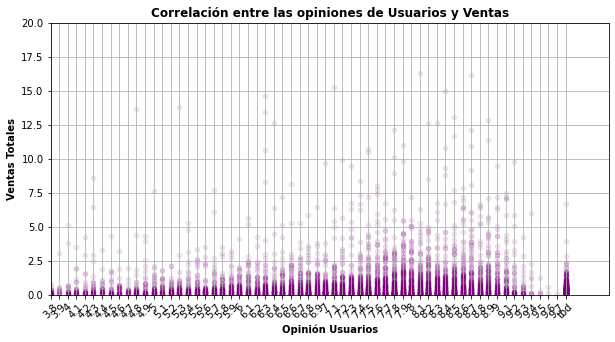

In [65]:
#implemetamos el gráfico de dispersión propuesto en las lineas 
#anteriormente descritas
video_juegos.loc[video_juegos['user_score'].isnull()== False 
                ].sort_values( by = 'user_score', 
                         ascending=True).plot(x='user_score', 
                                              y='ventas_totales', 
                                              kind='scatter', 
                                              alpha=0.1, 
                                              color = 'purple', 
                                              figsize=(10, 5))
plt.title('Correlación entre las opiniones de Usuarios y Ventas', 
          fontweight ='bold', fontsize = 12)  
plt.xlim(35, 100)
plt.ylim(0, 20)
plt.xlabel('Opinión Usuarios', fontweight ='bold', fontsize = 10)
plt.ylabel('Ventas Totales', fontweight ='bold', fontsize = 10)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

Existe una correlación positiva, aunque muy débil. Confirmemos mediante una evaluación con el coeficiente de correlación, usando la categorización de la variable <em>user_score</em> que es <em>cat_user_Score</em>.

In [66]:
# vamos a comparar las ventas promedio contra las evaluaciones de las
#criticas de usuarios en el tema 
video_juegos['cat_user_Score'].corr(video_juegos['ventas_totales']) 

0.12094207566221299

.<a id=paso3-4></a>
### Comparando las ventas de  mismos juegos en otras plataformas.

Realizemos una tabla dinámica que nos permita observar las ventas, de cada una de los videojuegos frente a las plataformas en las que se les designó el lanzamiento.

Para tal efecto, vamos a usar los datos de las consolas con mayor desempeño de ventas por año, ádemas de incluir la de asenso en las ventas durante los último 16 años. Según lo obtenido en los apartados anteriores.

In [67]:
#con una tabla dinámica, obtenemos que juegos a sido lanzados en 
#mas de una plataforma, para realizar comparativos de 
#desempeño en ventas
mas_plataform = video_juegos.loc[
                    video_juegos.platform.isin(
                     ["ps4" ,"ps3","xone","3ds","gb","nes","gen"])              
                                ].pivot_table(index= 'name', 
                                             values= 'platform',
                                            aggfunc= 'count')
mas_plataform = mas_plataform.loc[
    mas_plataform['platform'] > 1]
mas_plataform

,platform
name,
7 days to die,2
adventure time: explore the dungeon because i don't know!,2
adventure time: finn & jake investigations,4
aegis of earth: protonovus assault,2
agatha christie's the abc murders,2
...,...
yoshi,2
yoshi's cookie,2
young justice: legacy,2


In [68]:
#se prepara un filtro para obtener los datos relevantes
rangoAños = range (2013, 2016, 1)
rangoJuegos = mas_plataform.index
filtrar = ('(platform == "x360" ' )
filtrar = filtrar  + (' or platform == "ps4" ')
filtrar = filtrar  + (' or platform == "ps3" ')
filtrar = filtrar  + (' or platform == "xone" ')
filtrar = filtrar  + (' or platform == "3ds" ')
filtrar = filtrar  + (' or platform == "gb" ')
filtrar = filtrar  + (' or platform == "nes" ')
filtrar = filtrar  + (' or platform == "gen") ' )
filtrar = filtrar  +  ( 'and (year_of_release in @rangoAños) ')
filtrar = filtrar  +  ( 'and (name in @rangoJuegos) ')
filtrar = filtrar  +  ( 'and (cat_user_Score > 8) ')
filtrar = filtrar  +  ( 'and (critic_score > 60) ')
#se filtran las mejores plataformas según su desempeño en ventas totales
filtro_mejores_plataformas = video_juegos.query(filtrar)

juegos_plataforma = filtro_mejores_plataformas.pivot_table(index= 'name', 
                                             values= 'ventas_totales',
                                            columns = 'platform',
                                            aggfunc= 'sum')
#depuramos los valores de la reciente tabla dinámica en los que no hay
#datos
lista_plataform = ['3ds', 'ps3', 'ps4', 'x360', 'xone']
for plataforma in lista_plataform:
    juegos_plataforma [ plataforma ].fillna (0 , inplace = True )

juegos_plataforma

platform,3ds,ps3,ps4,x360,xone
name,,,,,
alien: isolation,0.00,0.00,1.12,0.00,0.00
assassin's creed iv: black flag,0.00,3.71,0.00,0.00,0.00
atelier sophie: the alchemist of the mysterious book,0.00,0.00,0.12,0.00,0.00
brothers: a tale of two sons,0.00,0.00,0.13,0.00,0.04
dark souls ii,0.00,1.28,0.00,0.00,0.00
grand theft auto v,0.00,21.05,12.62,16.27,0.00
jojo's bizarre adventure: all star battle,0.00,0.58,0.00,0.00,0.00
lego the hobbit,0.00,0.00,0.00,0.45,0.00
metal gear solid v: the phantom pain,0.00,0.00,3.42,0.00,0.00


Usando los datos de la tabla anterior, realizaremos un resumen de esta usando la siguiente metodología; podremos puntos por cada juego de la lista que resulte con el número mayor de ventas.

Realizaremos un tabla, apoyados en un diccionario donde se guardará el puntaje obtenido de cada consola que fué relevante de la tabla dinámica mostrada arriba de estas líneas.

In [69]:
#diccionario y dataframe donde se recepcionará los puntajes para
#evaluar el desmpeño de las plataformas consideradas relevantes 
#para nuestro análisis
data = {'3ds':0,
        'ps3':0, 
        'ps4':0, 
        'x360':0, 
        'xone':0
        } 
puntaje = pd.DataFrame.from_dict(data, orient ='index') 
puntaje = puntaje.rename(columns = {0:'puntaje'})
puntaje

,puntaje
3ds,0
ps3,0
ps4,0
x360,0
xone,0


In [70]:
#vamos ahora a obtener las plataformas que más puntaje obtengan
#haciendo uso de la tabla anterior
for juego in juegos_plataforma.index:
    for plataforma in puntaje.index:
        if max(juegos_plataforma.loc[juegos_plataforma.index==juego].max(axis=1)) == float(juegos_plataforma.loc[ 
        juegos_plataforma.index == juego, plataforma
            ]):
            puntaje.loc[puntaje.index == plataforma] = puntaje.loc[puntaje.index == plataforma]  + 1 
puntaje  

,puntaje
3ds,1
ps3,6
ps4,11
x360,1
xone,1


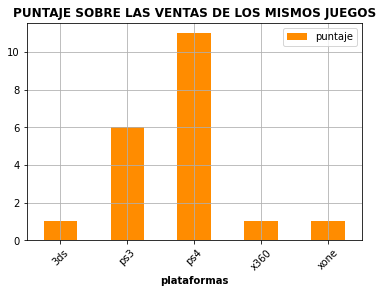

In [71]:
#procedemos a realizar la traza de los puntajes en una gráfica
puntaje.plot(kind='bar', color = 'darkorange') 
plt.title('PUNTAJE SOBRE LAS VENTAS DE LOS MISMOS JUEGOS', fontweight ='bold', fontsize = 12)
plt.grid(True)
plt.xticks(rotation=45)
plt.xlabel('plataformas', fontweight ='bold', fontsize = 10 )
plt.show()          

Podemos concluir que las plataformas que prometen mas ventas con los datos actuales PS3 y PS4.

.<a id=paso3-5></a>
### Géneros más rentables.

Será interesante, conocer si los géneros presentan alguna influencia determinante en las ventas. Tracemos los datos generales y observemos cuáles son los que 
mas ventas se adjudican.

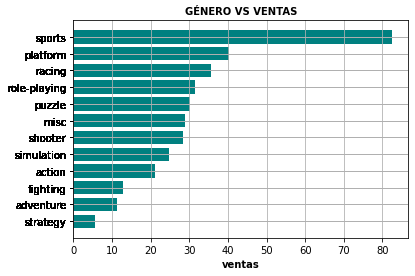

In [72]:
#gráfica de las ventas por género


fig, ax = plt.subplots()

# datos a comparar en la gráfica
y_pos = video_juegos['genre']
x_pos = video_juegos['ventas_totales']

ax.barh(y_pos, x_pos, align='center', color= 'teal')
ax.grid(True)
ax.set_yticks(y_pos)
ax.invert_yaxis()  
ax.set_xlabel('ventas', fontweight ='bold', fontsize = 10 )
ax.set_title('GÉNERO VS VENTAS', fontweight ='bold', fontsize = 10 )

plt.show()

El género SPORTS es el que domina en este aspecto de ventas. 

Los géneros con ventas altas refieren a cierta tendencia por comprar los juegos que definen una un inicio y una meta por alcanzar.

Los géneros con ventas bajas refieren a la tendencia a no preferir a los juegos que requieren de estrategias y conocimiento avanzado para utilizarlos.

<a id=paso4></a>
## . Creando un perfíl de usuario para cada región.

Para cada región es muy probable que existan diferencias entre los géneros consumidos, el tipo de plataforma entre otros aspectos. Por lo que es relevante implementar un análisis sobre esta variable en influencia con las demás, estudiadas.

.<a id=paso4-1></a>
### Cinco plataformas principales.

Describamos las variaciones de las cinco plataformas principales en sus cuotas de mercado de una región a otra. Recordemos que tenemos tres (NA, UE, JP).

In [73]:
#En cada una de las siguientes listas vaciaremos las ventas por región para
#las cinco consolas mas relevantes en 
#lista_plataform = ['3ds', 'ps3', 'ps4', 'x360', 'xone']
NA_means = []
UE_means = []
JP_means = []
#definimos una función para llenar las listas con la información para 
#cada región
def implementa_means(consola):
    NA_means.append(video_juegos.loc[
        video_juegos['platform'] == consola , 'na_sales'].sum())
    UE_means.append(video_juegos.loc[
        video_juegos['platform'] == consola , 'eu_sales'].sum())
    JP_means.append(video_juegos.loc[
        video_juegos['platform'] == consola , 'na_sales'].sum())
    
#lista_plataform = ['3ds', 'ps3', 'ps4', 'x360', 'xone'], tiene los datos de
#las consolas mas relevantes
for elemento in lista_plataform:
    implementa_means(elemento)

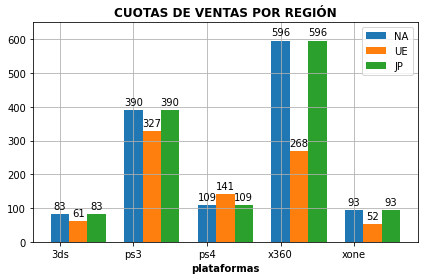

In [74]:
#Obtenemos la posicion de cada etiqueta en el eje de X
x = np.arange(len(lista_plataform))
#tamaño de cada barra
width = 0.25

fig, ax = plt.subplots()

#Generamos las barras para el conjunto de hombres
rects1 = ax.bar(x + 0.00, NA_means, width, label='NA')
#Generamos las barras para el conjunto de mujeres
rects2 = ax.bar(x + 0.25, UE_means, width, label='UE')
#Generamos las barras para el conjunto de mujeres
rects3 = ax.bar(x + 0.50, JP_means, width, label='JP')

#Añadimos las etiquetas de identificacion de valores en el grafico
ax.set_xlabel('plataformas', fontweight ='bold')
ax.set_title('CUOTAS DE VENTAS POR REGIÓN', fontweight ='bold')
ax.set_xticks(x)
ax.set_xticklabels(lista_plataform)
#Añadimos un legen() esto permite mmostrar con colores a que pertence cada valor.
ax.legend()

def autolabel(rects):
    """Funcion para agregar una etiqueta con el valor en cada barra"""
    for rect in rects:
        height = round(rect.get_height())
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

#Añadimos las etiquetas para cada barra
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.savefig('doble_barra.png')
plt.ylim(0, 650)
plt.grid(True)
#Mostramos la grafica con el metodo show()
plt.show()


En las plataformas estudiadas únicamente varia la predominancia del mercado de la unión europea en la consola **PS4**.

Las ventas entre el mercado de Norteámerica y Japón son en el resumén consideradas como iguales con una segunda instancia para el mercado de la unión europea.

.<a id=paso4-2></a>
### Cinco géneros principales.

Hagamos un análisis análogo para los cinco géneros principales. De conformidad con el apartado 344 de este estudio son: SPORTS, PLATFORM y RACING.

In [75]:
#En cada una de las siguientes listas vaciaremos las ventas por región para
#los génros mas relevantes en SPORTS, PLATFORM y RACING.
NA_means = []
UE_means = []
JP_means = []
#definimos una función para llenar las listas con la información para 
#cada región
def implementa_means2(genero):
    NA_means.append(video_juegos.loc[
        video_juegos['genre'] == genero , 'na_sales'].sum())
    UE_means.append(video_juegos.loc[
        video_juegos['genre'] == genero , 'eu_sales'].sum())
    JP_means.append(video_juegos.loc[
        video_juegos['genre'] == genero , 'na_sales'].sum())
    
#tiene los datos de las consolas mas relevantes    
lista_generos = ['sports', 'platform', 'racing']
for elemento in lista_generos:
    implementa_means2(elemento)

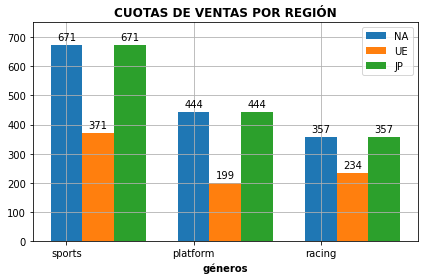

In [76]:

#Obtenemos la posicion de cada etiqueta en el eje de X
x = np.arange(len(lista_generos))
#tamaño de cada barra
width = 0.25

fig, ax = plt.subplots()

#Generamos las barras para el conjunto de hombres
rects1 = ax.bar(x + 0.00, NA_means, width, label='NA')
#Generamos las barras para el conjunto de mujeres
rects2 = ax.bar(x + 0.25, UE_means, width, label='UE')
#Generamos las barras para el conjunto de mujeres
rects3 = ax.bar(x + 0.50, JP_means, width, label='JP')

#Añadimos las etiquetas de identificacion de valores en el grafico
ax.set_xlabel('géneros', fontweight ='bold')
ax.set_title('CUOTAS DE VENTAS POR REGIÓN', fontweight ='bold')
ax.set_xticks(x)
ax.set_xticklabels(lista_generos)
#Añadimos un legen() esto permite mmostrar con colores a que pertence cada valor.
ax.legend()

def autolabel(rects):
    """Funcion para agregar una etiqueta con el valor en cada barra"""
    for rect in rects:
        height = round(rect.get_height())
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

#Añadimos las etiquetas para cada barra
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.savefig('doble_barra.png')
plt.ylim(0, 750)
plt.grid(True)
#Mostramos la grafica con el metodo show()
plt.show()


Como se puede observar presentan la misma estructura de empate en ventas entre las regiones de Norteámerica y Japón , tercer lugar la Unión Europea.
 
Por otra parte tenemos a la notoría influencia en las ventas para los juegos del género **sports**.

.<a id=paso4-3></a>
### Influencia de las Clasificaciones de ESRB .

Si las clasificaciones de ESRB afectan a las ventas en regiones individuales. Para el efecto debemos de preguntarnos si existe correlación entre las dos variantes.

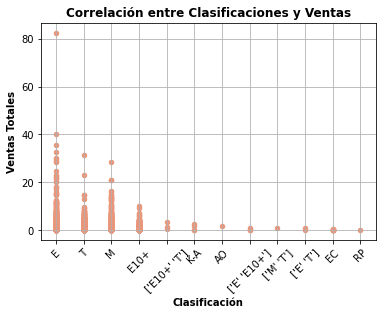

In [77]:
#establecer un diagrama de correlación y observar la influencia
# si existe interdepencia de ambas variables

video_juegos.plot(x='rating', 
                  y='ventas_totales', 
           kind='scatter', 
           color = 'darksalmon')
plt.title('Correlación entre Clasificaciones y Ventas', 
          fontweight ='bold', fontsize = 12)  
plt.xlabel('Clasificación', fontweight ='bold', fontsize = 10)
plt.ylabel('Ventas Totales', fontweight ='bold', fontsize = 10)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Veamos que existe una cierta tendencia lineal negativa, para los juegos que ese clasifican para mayores edades, como es de experarse debido a que estamos segmentado el mercado de la clasificación E-every thing- , T- Teen- a M-Mature.

<a id=paso5></a>
## . Pruebas de hipotesís.

Para identificar patrones que determinen si un juego tiene éxito o no; partamos primero de si la evidencia observadad en las plataformas es estadísticamente real, es decir que si hay razones para pensar que el éxito en ventas esta marcadamente influenciado por el tipo de plataforma. 

.<a id=paso5-1></a>
### Las plataformas y las calificaciones de usuarios .

Realizaremos una prueba de hipotesís en los siguientes terminos:
- <em>Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas<em/>.
    
Si el valor promedio de esta población es igual, hay fuerte evidencia estadísitica de que las plataformas de lanzamiento,  no forman un aspecto que influya en las calificaciones, que recibe un video juego.

Usemos la notación $\mu_{\text{XOne}}$ para denotar las calificaciones promedio de la plataforma de **Xbox One** y $\mu_{\text{PC}}$ para denotar las calificaciones promedio de la plataforma de **PC**.

1. Nuestras hipótesis a plantear serán:

$H_0: \mu_{\text{XOne}} = \mu_{\text{PC}}$

$H_a: \mu_{\text{XOne}} \neq \mu_{\text{PC}}$

2. Establezcamos un nivel de significancia del 90%.

3. Seleccionemos un estadístico de prueba.

In [78]:
#pasamos en dos objetos lista las dos muestras de valores 
#para analizar

sample_Xbox = video_juegos.loc[video_juegos['platform'] == 'xone', 'cat_user_Score']
sample_PC = video_juegos.loc[video_juegos['platform'] == 'pc', 'cat_user_Score']

alpha = 0.9 # el nivel de significancia estadística crítica
# si el valor p es menor que alfa, rechazamos la hipótesis

results = st.ttest_ind(sample_Xbox, sample_PC)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value:  0.00018915851026593628
Rechazamos la hipótesis nula


Es decir si existe influencia entre las calificaciones de los usuarios y las plataformas, estudiadas.

El valor p nos dice que aunque las cantidades promedio para los dos plataformas sean iguales, esta probabilidad mucho mayor  90% de probabilidad de obtener aleatoriamente una diferencia de ese tamaño o mayor. Esta probabilidad es claramente demasiado alta para concluir que no existe una diferencia significativa entre los valores promedio registrados para cada plataforma.

.<a id=paso5-2></a>
### Los géneros y las calificaciones de usuarios .

El género presentó evidencia de su influencia en las ventas para un video juego. Verifiquemos esto usando una prueba estadísitica, para los géneros de **Deportes** y **Acción**. 


Realizaremos una prueba de hipotesís en los siguientes terminos:
- <em> Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes<em/>. 

Si el valor promedio de esta población es igual, hay fuerte evidencia estadísitica de que los géneros no forman un aspecto que influya en las calificaciones, que recibe un video juego.
    
Usemos la notación $\mu_{\text{Acción}}$ para denotar las calificaciones promedio de él género **action** y $\mu_{\text{Deportes}}$ para denotar las calificaciones promedio de él género **Deportes**.

1. Nuestras hipótesis a plantear serán:

$H_0: \mu_{\text{Acción}} = \mu_{\text{Deportes}}$

$H_a: \mu_{\text{Acción}} \neq \mu_{\text{Deportes}}$

2. Establezcamos un nivel de significancia del 90%.

3. Seleccionemos un estadístico de prueba.

In [79]:
#pasamos en dos objetos lista las dos muestras de valores 
#para analizar


sample_accion = video_juegos.loc[video_juegos['genre'] == 'action', 'cat_user_Score']
sample_deporte = video_juegos.loc[video_juegos['genre'] == 'sports', 'cat_user_Score']

alpha = 0.90 # el nivel de significancia estadística crítica
# si el valor p es menor que alfa, rechazamos la hipótesis

results = st.ttest_ind(sample_accion, sample_deporte)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value:  4.980302438830364e-06
Rechazamos la hipótesis nula


El valor p nos dice que aunque las cantidades promedio para los dos plataformas sean iguales, esta probabilidad mucho mayor  90% de probabilidad de obtener aleatoriamente una diferencia de ese tamaño o mayor. Esta probabilidad es claramente demasiado alta para concluir que no existe una diferencia significativa entre los valores promedio registrados para cada género.

Es decir si existe influencia entre las calificaciones de los géneros, estudiados.

<a id=paso6></a>
## . Conclusión General.

1. Existe evidencia de la influencia entre el género elegido para realizar un video juego y las calificaciones de preferencia de los usuarios.
2. Existe evidencia de la influencia entre la plataforma de lanzamiento elegida para realizar un video juego y las calificaciones de preferencia de los usuarios.
3. Se debe tomar con reserva la influencia de las clasificaciones ESRB, encuanto a las ventas para un video juego, aunque es relevante tomarlas en consideración.
4. Las ventas de un video juego presentan una tendencia a estar muy influenciadas por las regiones Norteaméricana y Japonesa.

<a id='R6'></a> 
## . Recomendaciones. 
- `Se recomienda favorecer la realización de video juegos en las plataformas 'ps3', 'ps4', 'x360' y 'xone'.`
- `Se recomienda favorecer la realización de video juegos en los géneros 'sports', 'platform' y 'racing'.`
- `Las ventas por región debe considerarse como prioridad las reseñas de las regiones Norteaméricana y de Japón.`

[Volver a Contenidos](#back)